### $\text{Homework - I}$

$\text{Problem-5: Stiff Problem}$

$\text{Given initial value problem: }$
<br/>
$y' = -100y + 100t + 1, y(0)=1$
<br/>
$\text{which can also be written as the following}$
<br/>
$y' + 100y = 100t + 1$
<br/>
$\text{i.e. a non-linear first order differential equation of the form:}$
<br/>
$y' + p(t)y = r(t), p(t) = 100, r(t) = 100t + 1\hspace{10mm}(\text{I})$
<br/>
$\text{Using the method of exact integral, }$
<br/>
$u(t) = e^{\int p(t) dt} = e^{\int 100 dt}$
<br/>
$\text{Multiplying both sides in (I) by u(t), we get}$
<br/>
$e^{\int 100 dt}(y' + 100y) = e^{\int 100 dt}(100t + 1)$
<br/>
$\implies (e^{\int 100 dt}y)' = e^{\int 100 dt}(100t + 1)$
<br/>
$\text{Integrating both sides, we get}$
<br/>
$\implies [e^{\int 100 dt}y]_{0,1}^{t,y}  = \int_{0}^{t} e^{\int 100 dt}(100t + 1) dt$
<br/>
$\implies [e^{100t}y]_{0,1}^{t,y}  = \int_{0}^{t} e^{100t}(100t + 1) dt$
<br/>
$\text{Integrating by parts,}$
<br/>
$\implies e^{100t}y - 1  = [(100t+1)\int e^{100t}dt - \int \frac{d(100t + 1)}{dt} (\int e^{100t}dt) dt]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [\frac{(100t+1)e^{100t}}{100} - \int 100 \frac{e^{100t}}{100} dt]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [\frac{(100t+1)e^{100t}}{100} - \frac{e^{100t}}{100}]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [\frac{(100t+1)e^{100t}}{100} - \frac{e^{100t}}{100}]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [\frac{(100t)e^{100t}}{100}]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [\frac{(100t)e^{100t}}{100}]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [te^{100t}]_{0}^{t}$
<br/>
$\implies e^{100t}y - 1  = [te^{100t}]_{0}^{t}$
<br/>
$\implies e^{100t}y = 1  + te^{100t}$
<br/>
$\implies y = e^{-100t}  + t$

In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
to = 0
yo = 1
tn = 1

In [3]:
def f_(t,y):
    val = -100*y + 100*t + 1
    return val

In [4]:
def f(t):
    y = np.exp(-100*t) + t
    return y

In [5]:
def forward_euler(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        y.append(y[-1] + h*func(t,y[-1]))
        t += h
        x.append(t)
    
    return x,y     

In [6]:
def backward_euler(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        
        y_prev = y[-1]
        y_old = y[-1]
        
        for i in range(10000):
            y_curr = y_prev + h*func(t,y_old)
            y_old = y_curr
        
        x.append(t)
        y.append(y_curr)
        
        t += h
    
    return x,y

In [7]:
def runge_kutta(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    t += h
    while t <= tn:
        
        k1 = func(x[-1],y[-1])
        k2 = func(x[-1] + (h/2), y[-1] + (h/2)*k1)
        k3 = func(x[-1] + (h/2), y[-1] + (h/2)*k2)
        k4 = func(x[-1] + h, y[-1] + h*k3)
        y_ = y[-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        y.append(y_)
        
        t += h
        x.append(t)
    
    return x,y  

In [8]:
# compute analytical solution
def compute_analytical(h):
    to = 0
    tn = 1
    x = []
    y = []
    while to <= tn:
        x.append(to)
        y.append(f(to))
        to += h 
    return x,y

$\text{For each method, I start with h = 0.01 and then keep reducing h by a factor of }\frac{1}{2}$
<br/>
$\text{till the error }|y(t_{n})-\phi(t_{n})| \text{ converges within an upper bound of }5\cdot10^{-4} \text{ at}$
<br/>
$\text{t = 0.05 and t = 0.1}$
<br/>
$\text{Then I plot the converged }\phi(t_{n})\text{ against }y(t_{n}).$

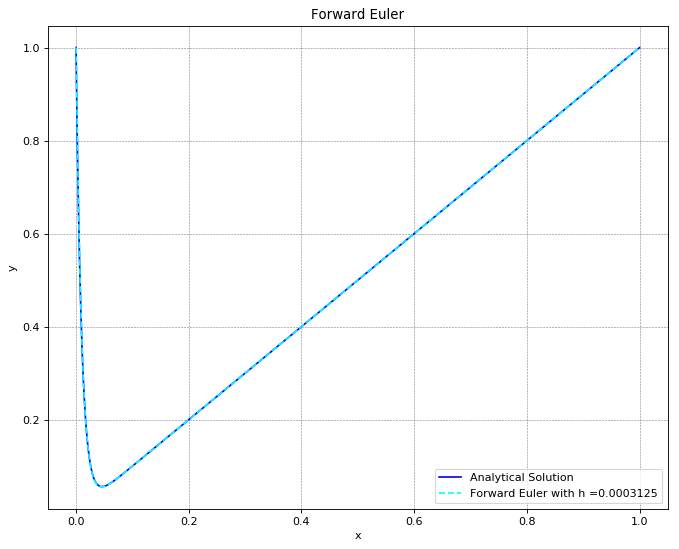

In [9]:
# Forward Euler Method
h = 0.01

while True:
    
    x,y = compute_analytical(h)
    x_fwe, y_fwe = forward_euler(to, tn, yo, h, f_)
    
    i1 = int(0.05/h)
    i2 = int(0.1/h)
    
    error_1 = np.absolute(y[i1] - y_fwe[i1])
    error_2 = np.absolute(y[i2] - y_fwe[i2])
    
    if error_1 < 5*np.power(10.0,-4) and error_2 < 5*np.power(10.0,-4):
        break
    else:
        h /= 2

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Forward Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x,y,color='blue',label='Analytical Solution')
plt.plot(x_fwe,y_fwe,color='cyan',linestyle='dashed',label='Forward Euler with h ='+str(h))
plt.legend(loc='best')
plt.show()

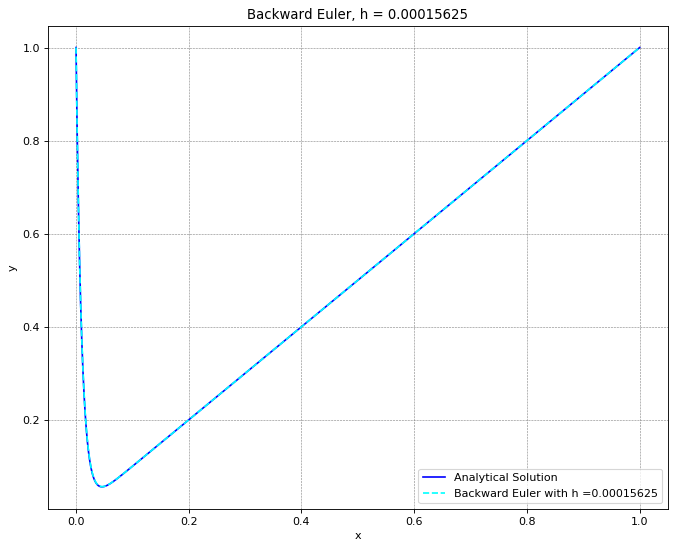

In [10]:
# Backward Euler Method
h = 0.01

while True:
    
    x,y = compute_analytical(h)
    x_bwe, y_bwe = backward_euler(to, tn, yo, h, f_)
    
    i1 = int(0.05/h)
    i2 = int(0.1/h)
    
    error_1 = np.absolute(y[i1] - y_bwe[i1])
    error_2 = np.absolute(y[i2] - y_bwe[i2])
    
    if error_1 < 5*np.power(10.0,-4) and error_2 < 5*np.power(10.0,-4):
        break
    else:
        h /= 2

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Backward Euler, h = '+str(h))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x,y,color='blue',label='Analytical Solution')
plt.plot(x_bwe,y_bwe,color='cyan',linestyle='dashed',label='Backward Euler with h ='+str(h))
plt.legend(loc='best')
plt.show()

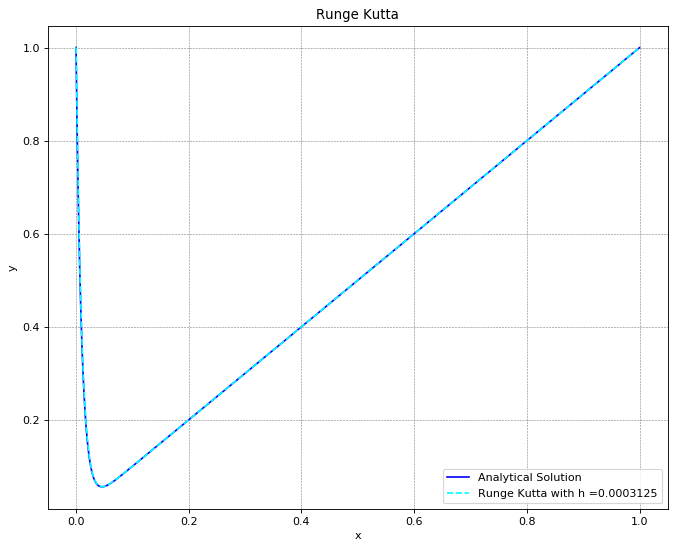

In [11]:
# Runge Kutta Method
h = 0.01

while True:
    
    x,y = compute_analytical(h)
    x_rk4, y_rk4 = runge_kutta(to, tn, yo, h, f_)
    
    i1 = int(0.05/h)
    i2 = int(0.1/h)
    
    error_1 = np.absolute(y[i1] - y_rk4[i1])
    error_2 = np.absolute(y[i2] - y_rk4[i2])
    
    if error_1 < 5*np.power(10.0,-4) and error_2 < 5*np.power(10.0,-4):
        break
    else:
        h /= 2

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Runge Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x,y,color='blue',label='Analytical Solution')
plt.plot(x_rk4,y_rk4,color='cyan',linestyle='dashed',label='Runge Kutta with h ='+str(h))
plt.legend(loc='best')
plt.show()

#### $\text{Ashwin Singh}$
<br/>

#### $\text{2017222}$